In [1]:
#本章需导入的模块
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.model_selection import train_test_split,KFold
import sklearn.neural_network as net
import sklearn.linear_model as LM
from scipy.stats import multivariate_normal
from sklearn.metrics import r2_score,mean_squared_error,classification_report
from sklearn import svm
import os

In [2]:
path='C:/Users/xuewe/《Python机器学习：数据建模与分析》代码/健康物联网/'
#print(os.path.dirname(path)) 返回文件路径 
#cwd=os.getcwd()  得到当前目录
#os.path.join(dirname, filename)
#os.walk(path) 

filenames=os.listdir(path=path)
data=pd.DataFrame(columns=['TimeStamp', 'frontal', 'vertical', 'lateral', 'SensorID', 'RSSI','Phase', 'Frequency', 'Activity', 'ID', 'Gender'])
i=1
for filename in filenames:
    tmp=pd.read_csv(path+filename)
    tmp['ID']=i
    tmp['Gender']=filename[-5]
    i+=1
    data=data.append(tmp)


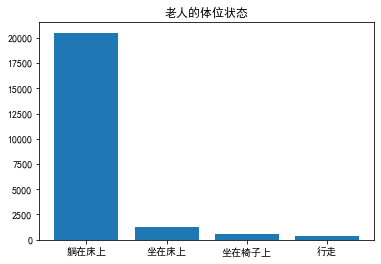

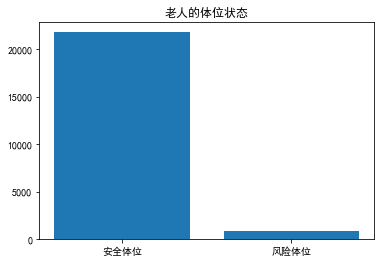

In [3]:
label=['坐在床上','坐在椅子上','躺在床上','行走']
countskey=data['Activity'].value_counts().index
plt.bar(np.unique(data['Activity']),data['Activity'].value_counts())
plt.xticks([1,2,3,4],[label[countskey[0]-1],label[countskey[1]-1],label[countskey[2]-1],label[countskey[3]-1]])
plt.title("老人的体位状态")
plt.show()
data['ActivityN']=data['Activity'].map({3:0,1:0,2:1,4:1})
plt.bar([1,2],data['ActivityN'].value_counts())
plt.xticks([1,2],['安全体位','风险体位'])
plt.title("老人的体位状态")
plt.show()


In [4]:
Y=data['Activity'].astype(int)
X=data[['frontal', 'vertical', 'lateral', 'RSSI']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=1)
for ker in ['poly','rbf']:
    modelSVC=svm.SVC(kernel=ker,random_state=123) 
    modelSVC.fit(X_train,Y_train)
    print("测试误差=%f(%s)"%(1-modelSVC.score(X_test,Y_test),ker))
    print(classification_report(Y_test,modelSVC.predict(X_test)))

测试误差=0.029143(poly)
              precision    recall  f1-score   support

           1       0.71      0.84      0.77       368
           2       0.79      0.76      0.78       170
           3       0.99      1.00      1.00      6147
           4       0.90      0.17      0.28       109

    accuracy                           0.97      6794
   macro avg       0.85      0.69      0.71      6794
weighted avg       0.97      0.97      0.97      6794

测试误差=0.030321(rbf)
              precision    recall  f1-score   support

           1       0.71      0.77      0.74       368
           2       0.82      0.71      0.76       170
           3       0.99      1.00      0.99      6147
           4       0.94      0.41      0.57       109

    accuracy                           0.97      6794
   macro avg       0.86      0.72      0.77      6794
weighted avg       0.97      0.97      0.97      6794



In [5]:
Y=data['ActivityN'].astype(int)
X=data[['frontal', 'vertical', 'lateral', 'RSSI']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=1)
modelSVC=svm.SVC(kernel='rbf',random_state=123) 
modelSVC.fit(X_train,Y_train)
print("训练误差=%f"%(1-modelSVC.score(X_train,Y_train)))
print("测试误差=%f"%(1-modelSVC.score(X_test,Y_test)))
print(classification_report(Y_test,modelSVC.predict(X_test)))

训练误差=0.020565
测试误差=0.022078
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6515
           1       0.81      0.61      0.69       279

    accuracy                           0.98      6794
   macro avg       0.90      0.80      0.84      6794
weighted avg       0.98      0.98      0.98      6794



In [6]:
tmp=data.loc[data['ActivityN']==0,]
random.seed(123)
ID=random.choice(tmp.shape[0],size=data['ActivityN'].value_counts()[1],replace=False)
NewData=tmp.iloc[ID,].append(data.loc[data['ActivityN']==1,])
Y0=NewData['ActivityN'].astype(int)
X0=NewData[['frontal', 'vertical', 'lateral', 'RSSI']]
modelSVC=svm.SVC(kernel='rbf',random_state=123) 
modelSVC.fit(X0,Y0)
print("训练误差=%f"%(1-modelSVC.score(X0,Y0)))
print("部分报告:\n",classification_report(Y_test,modelSVC.predict(X_test)))

训练误差=0.024277
部分报告:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      6515
           1       0.48      1.00      0.65       279

    accuracy                           0.95      6794
   macro avg       0.74      0.98      0.81      6794
weighted avg       0.98      0.95      0.96      6794



In [7]:
print("总报告:\n",classification_report(Y,modelSVC.predict(X)))

总报告:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     21781
           1       0.45      1.00      0.62       865

    accuracy                           0.95     22646
   macro avg       0.73      0.98      0.80     22646
weighted avg       0.98      0.95      0.96     22646

